In [3]:
import pandas as pd
df = pd.read_csv("IMDB_Data.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [10]:
positive_reviews = df[df['Sentiment'] == 'Positive']
positive_reviews.head(10)

,review,sentiment,Sentiment
0,One of the other reviewers has mentioned that ...,positive,Positive
1,A wonderful little production. <br /><br />The...,positive,Positive
2,I thought this was a wonderful way to spend ti...,positive,Positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Positive
5,"Probably my all-time favorite movie, a story o...",positive,Positive
6,I sure would like to see a resurrection of a u...,positive,Positive
7,"This show was an amazing, fresh & innovative i...",negative,Positive
9,If you like original gut wrenching laughter yo...,positive,Positive
10,Phil the Alien is one of those quirky films wh...,negative,Positive
11,I saw this movie when I was about 12 when it c...,negative,Positive


In [4]:
df.columns = df.columns.str.strip() 
df = df.dropna(subset=['review'])  
df = df[df['review'].str.strip() != '']

<Axes: >

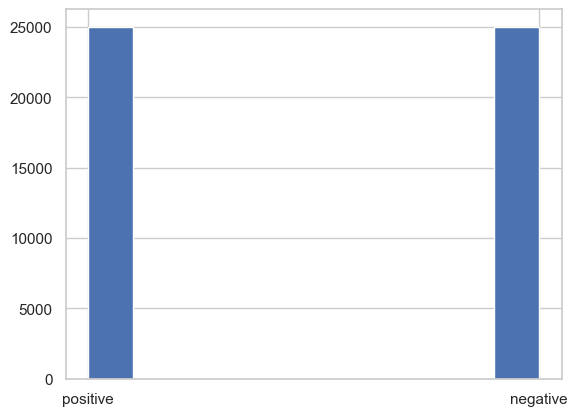

In [11]:
df.sentiment.hist()

<Axes: ylabel='sentiment'>

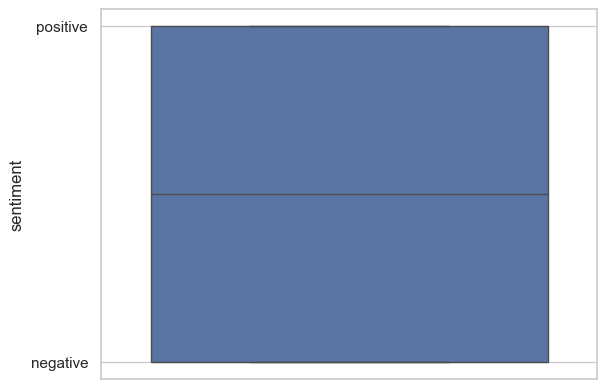

In [12]:
import seaborn as sns
sns.boxplot(df.sentiment)

In [5]:
!pip install textblob
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [6]:
df['Sentiment'] = df['review'].apply(get_sentiment)

In [7]:
print(df['Sentiment'].value_counts())

Sentiment
Positive    37934
Negative    12036
Neutral        30
Name: count, dtype: int64


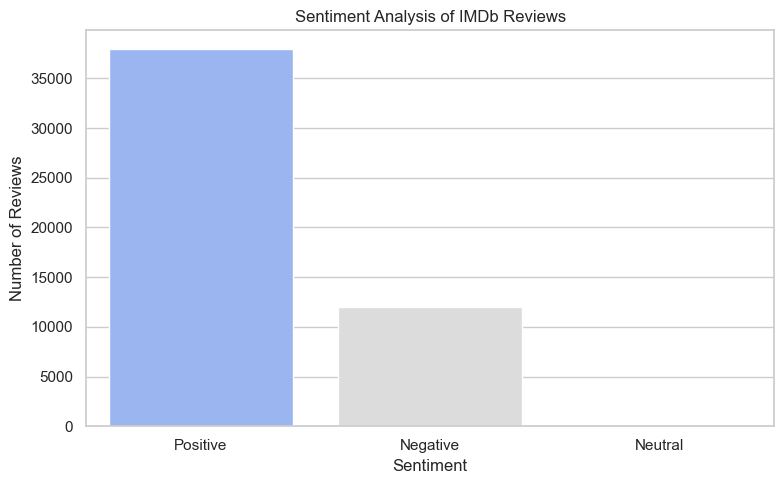

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='coolwarm', legend=False)
plt.title('Sentiment Analysis of IMDb Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()
